In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import mutual_info_classif

# Load the dataset
data_train = pd.read_csv("train_data.csv")
data_test = pd.read_csv("test_data.csv")

In [28]:
import json
def read_index_from_json(name, file_path='FeatureSelection.json'):
    try:
        # Read the JSON data from the file
        with open(file_path, 'r') as file:
            json_data = json.load(file)
        
        # Retrieve the index list for the given name
        index_list = json_data.get(name)
        
        # Check if the name exists in the JSON data
        if index_list is None:
            raise ValueError(f"The name '{name}' does not exist in the JSON file.")
        
        # Convert the list back to a pandas Index object
        index = pd.Index(index_list)
        
        return index
    except FileNotFoundError:
        raise FileNotFoundError(f"The file '{file_path}' does not exist.")
    except json.JSONDecodeError:
        raise ValueError(f"The file '{file_path}' does not contain valid JSON.")


In [29]:
top_features = read_index_from_json("RFE")
X_train = data_train.drop(columns=["Revenue_int"])
X_train = X_train.loc[:,top_features]
y_train = data_train["Revenue_int"]
X_test = data_test.drop(columns=["Revenue_int"])
X_test = X_test.loc[:,top_features]
y_test = data_test["Revenue_int"]

In [30]:
# Initialize and train the Random Forest model using features from MI
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediction: get the probability of the positive class
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Only positive class probabilities
y_pred = rf_model.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Compute AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

In [31]:
# Display results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)
print(f"AUC Score: {auc_score}")


Accuracy: 0.928866229667395
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      2038
           1       0.93      0.93      0.93      2081

    accuracy                           0.93      4119
   macro avg       0.93      0.93      0.93      4119
weighted avg       0.93      0.93      0.93      4119

Confusion Matrix:
 [[1901  137]
 [ 156 1925]]
AUC Score: 0.9820164826018292


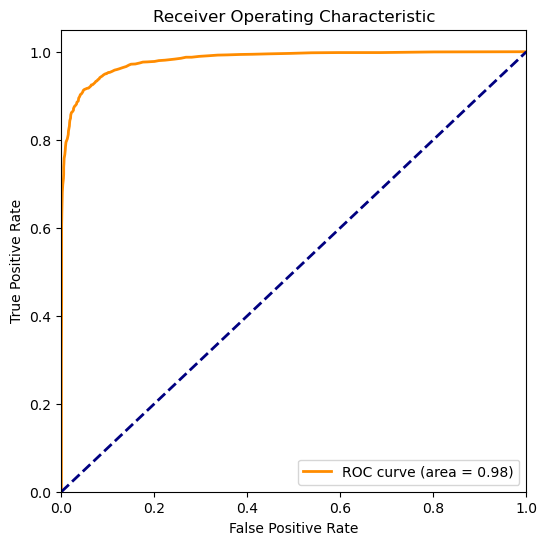

<Figure size 300x300 with 0 Axes>

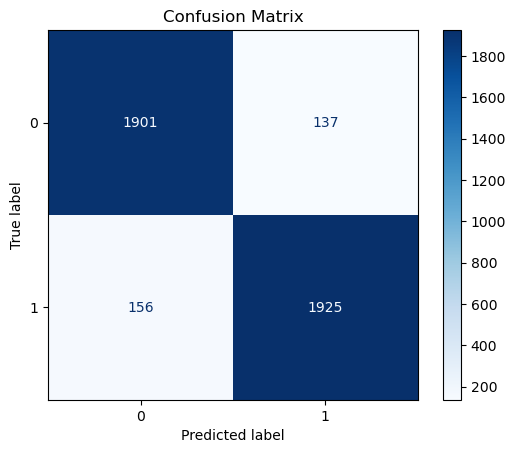

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 3. Confusion Matrix Visualization
plt.figure(figsize=(3, 3))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_leaf_nodes=20, max_samples=None, min_samples_leaf=1, min_samples_split=4, n_estimators=132; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_leaf_nodes=20, max_samples=None, min_samples_leaf=1, min_samples_split=4, n_estimators=132; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_leaf_nodes=20, max_samples=None, min_samples_leaf=1, min_samples_split=4, n_estimators=132; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_leaf_nodes=20, max_samples=None, min_samples_leaf=1, min_samples_split=4, n_estimators=132; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_leaf_nodes=20, max_samples=None, min_samples_leaf=1, min_samples_split=4, n_estimators=132; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, max_

c:\Users\13042\anaconda3\envs\my_env\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
325 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\13042\anaconda3\envs\my_env\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\13042\anaconda3\envs\my_env\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\13042\anaconda3\envs\my_env\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(


Best parameters found:  {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 91}
Accuracy: 0.9264384559359068
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2038
           1       0.93      0.93      0.93      2081

    accuracy                           0.93      4119
   macro avg       0.93      0.93      0.93      4119
weighted avg       0.93      0.93      0.93      4119

Confusion Matrix:
[[1891  147]
 [ 156 1925]]
AUC Score: 0.9811708249647849


<Figure size 600x600 with 0 Axes>

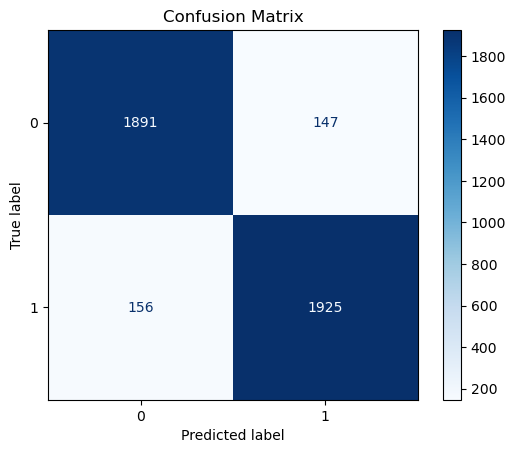

                                              params  mean_test_score  \
0  {'bootstrap': True, 'max_depth': None, 'max_fe...              NaN   
1  {'bootstrap': True, 'max_depth': 20, 'max_feat...              NaN   
2  {'bootstrap': False, 'max_depth': 10, 'max_fea...         0.958682   
3  {'bootstrap': False, 'max_depth': None, 'max_f...         0.982659   
4  {'bootstrap': False, 'max_depth': 20, 'max_fea...              NaN   

   std_test_score  rank_test_score  
0             NaN               36  
1             NaN               36  
2        0.005033               23  
3        0.001823                1  
4             NaN               36  


In [33]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from scipy.stats import randint

# Define a smaller parameter distribution
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['auto', 'sqrt'],
    'max_leaf_nodes': [None, 10, 20],
    'bootstrap': [True, False],
    'max_samples': [None, 0.5, 0.75]
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with reduced n_jobs and n_iter
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, 
                                   n_iter=100, cv=5, n_jobs=1, verbose=2, scoring='roc_auc', random_state=42)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_
print("Best parameters found: ", best_params)

# Evaluate the best model on the test data
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]  # Only positive class probabilities
y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"AUC Score: {auc_score}")

# 3. Confusion Matrix Visualization
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Store all iterations' scores and parameters in a DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Select relevant columns
results_df = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Display the top rows of the DataFrame
print(results_df.head())

# Save the DataFrame to a CSV file
results_df.to_csv('random_search_results.csv', index=False)
